In [3]:
import pydicom
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [4]:
health_image_id = "0e40d75b6a0f50c6855b6f3203f421a2"
ill_image_id = "0005e8e3701dfb1dd93d53e2ff537b6e"

In [5]:
df = pd.read_csv('train.csv')
ill_image_table = df[df.image_id == ill_image_id]
ill_image_table

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
664,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R10,900.0,587.0,1205.0,888.0
13648,0005e8e3701dfb1dd93d53e2ff537b6e,Nodule/Mass,8,R8,932.0,567.0,1197.0,896.0
15180,0005e8e3701dfb1dd93d53e2ff537b6e,Infiltration,6,R10,900.0,587.0,1205.0,888.0
16938,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R9,905.0,583.0,1203.0,890.0
48751,0005e8e3701dfb1dd93d53e2ff537b6e,Consolidation,4,R8,932.0,567.0,1197.0,896.0


In [6]:
class Rect:
    
    def __init__(self, x_min, y_min, x_max, y_max):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
        
    def __eq__(self, other):
        if isinstance(other, Rect):
            return (self.x_min == other.x_min) and (self.y_min == other.y_min) and (self.x_max == other.x_max) and (self.y_max == other.y_max)
        return False
    
    def __hash__(self):
        return hash((self.x_min, self.y_min, self.x_max, self.y_max))
    
    def __repr__(self):
        return f"({self.x_min},{self.y_min}) - ({self.x_max},{self.y_max})"

In [17]:
def draw_rect(rect, ax, index, class_name, c_map = plt.cm.get_cmap("hsv", 10)):
    left, top, width, height = rect.x_min, rect.y_min, rect.x_max-rect.x_min, rect.y_max-rect.y_min
    rect_patch = Rectangle((left, top), width, height, linewidth=1, edgecolor=c_map(index), facecolor='none', alpha=1, label=str(index)+": "+class_name)
    ax.add_patch(rect_patch)
    ax.text(left+width+2, top+2, str(index), color=c_map(index))

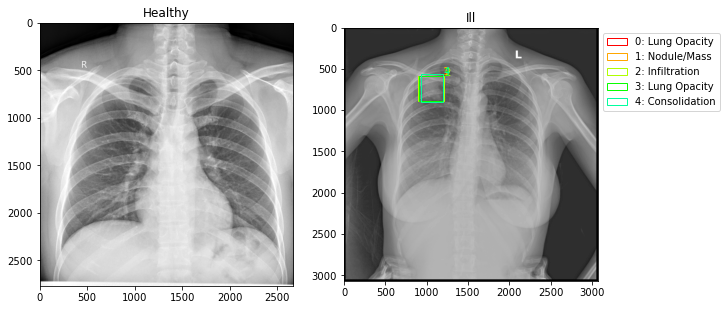

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].set_title("Healthy")
ax[0].imshow(pydicom.dcmread(f"{health_image_id}.dicom").pixel_array, cmap=plt.cm.gray)
ax[1].set_title("Ill")
ax[1].imshow(pydicom.dcmread(f"{ill_image_id}.dicom").pixel_array, cmap=plt.cm.gray)

c_map = plt.cm.get_cmap("hsv", 10)
for i, (row_index, row) in enumerate(ill_image_table.iterrows()):
    class_name = row.class_name
    draw_rect(Rect(row.x_min, row.y_min, row.x_max, row.y_max), ax[1], i, class_name, c_map)
    
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper right")